# 1 - Web scrape cryptocurrency data from Binance
### Use the Binance market data k-lines endpoint to find the BTC/USDT OHLCV data

In [32]:
import requests
import pandas as pd

# Binance API endpoint for K-lines
endpoint = "https://api.binance.com/api/v1/klines"

# Parameters for the request
symbol = "BTCUSDT"  # Trading pair symbol
interval = "1d"    # Time interval (1d for daily data)
limit = 10        # Number of data points to retrieve (adjust as needed)

# Construct the query parameters
params = {
    "symbol": symbol,
    "interval": interval,
    "limit": limit
}

# Send a GET request to the Binance API
response = requests.get(endpoint, params=params)

data = response.json()

# Create a DataFrame and name the columns
df_binance = pd.DataFrame(data, columns=["Open time", "Open", "High", "Low", "Close", "Volume",
                                     "Close time", "Quote asset volume", "Number of trades",
                                     "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"])
df_binance=df_binance[["Open time", "Open", "High", "Low", "Close", "Volume"]]



In [33]:
df_binance

,Open time,Open,High,Low,Close,Volume
0,1693612800000,25805.04000000,25987.50000000,25752.47000000,25869.51000000,16250.77698000
1,1693699200000,25869.52000000,26135.00000000,25800.00000000,25971.21000000,17474.47667000
2,1693785600000,25971.21000000,26108.02000000,25631.21000000,25826.02000000,21777.59609000
3,1693872000000,25826.03000000,25915.49000000,25562.62000000,25792.10000000,21323.39337000
4,1693958400000,25792.11000000,26040.00000000,25372.51000000,25759.95000000,27262.52386000
5,1694044800000,25759.95000000,26443.14000000,25615.38000000,26255.00000000,27687.49567000
6,1694131200000,26255.00000000,26445.50000000,25647.26000000,25910.50000000,28999.76471000
7,1694217600000,25910.50000000,25945.09000000,25796.64000000,25901.61000000,10980.62277000
8,1694304000000,25901.60000000,26033.66000000,25570.57000000,25841.61000000,18738.26914000
9,1694390400000,25841.60000000,25900.69000000,24951.00000000,25003.86000000,28113.58178000


In [34]:
# Convert the numeric column to a string, remove the last 3 characters, and convert back to numeric
from datetime import datetime

df_binance['Open time'] = df_binance['Open time'].astype(str).str[:-3].astype(int)

# Convert timestamp to date
df_binance['dates'] = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d') for ts in df_binance['Open time']]
df_binance = df_binance.drop(columns=['Open time'])

# Use date as index
df_binance = df_binance.set_index('dates')

#Df in in obkect type. Convert to float
df_binance=df_binance.astype(float)

In [35]:
df_binance

,Open,High,Low,Close,Volume
dates,,,,,
2023-09-02,25805.04,25987.50,25752.47,25869.51,16250.77698
2023-09-03,25869.52,26135.00,25800.00,25971.21,17474.47667
2023-09-04,25971.21,26108.02,25631.21,25826.02,21777.59609
2023-09-05,25826.03,25915.49,25562.62,25792.10,21323.39337
2023-09-06,25792.11,26040.00,25372.51,25759.95,27262.52386
2023-09-07,25759.95,26443.14,25615.38,26255.00,27687.49567
2023-09-08,26255.00,26445.50,25647.26,25910.50,28999.76471
2023-09-09,25910.50,25945.09,25796.64,25901.61,10980.62277
2023-09-10,25901.60,26033.66,25570.57,25841.61,18738.26914


# 2- Plot the BTC closing price 

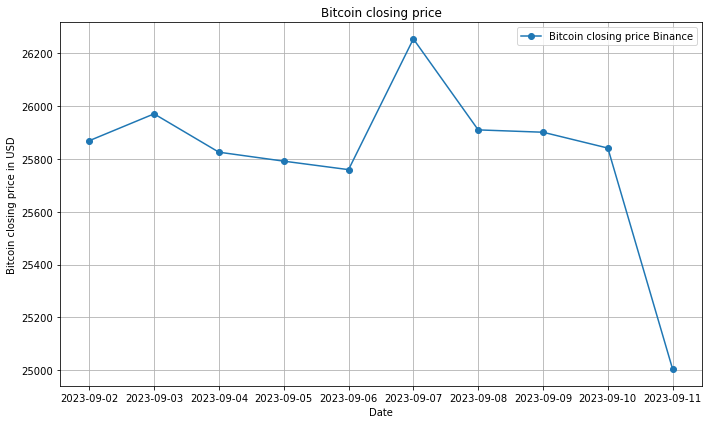

In [36]:
import matplotlib.pyplot as plt



# Plot Bitcoin and Ethereum prices
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_binance.index, df_binance['Close'], label='Bitcoin closing price Binance', marker='o')

# Customize the plot
plt.title('Bitcoin closing price')
plt.xlabel('Date')
plt.ylabel('Bitcoin closing price in USD')


plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensures labels and titles fit within the figure
plt.show()

In [37]:
df_plot = pd.DataFrame({ 'Bitcoin closing price Binance ': df_binance['Close'] })
import plotly.express as px
fig = px.line(df_plot, x=df_plot.index.values, y=df_plot.columns,
              title='custom tick labels')
fig.update_layout(title_text='Bitcoin closing price (Binance vs CCData)', 
                   font_size=15, font_color='black', legend_title_text='Legend')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Bitcoin closing price in USD')
fig.show()